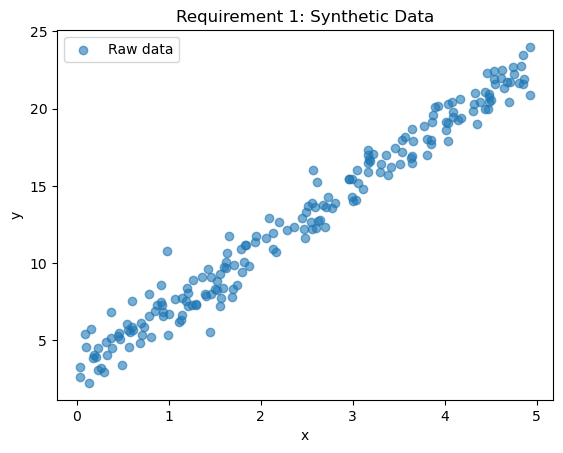

Requirement 2: Closed-form solution
Intercept: 3.1052011509608213
Slope: 3.9843857863650065

Requirement 3: Gradient Descent solution
Intercept: 3.1052011509363893
Slope: 3.9843857863726124

Requirement 4: Comparison
Closed-form vs Gradient Descent:
Intercepts: 3.1052 vs 3.1052
Slopes: 3.9844 vs 3.9844

Comment: Gradient Descent converged to nearly the same solution as the closed-form method.
Minor differences are due to numerical precision and finite iterations.


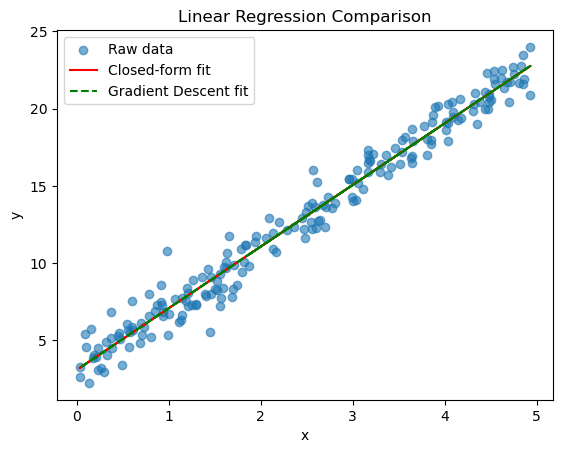

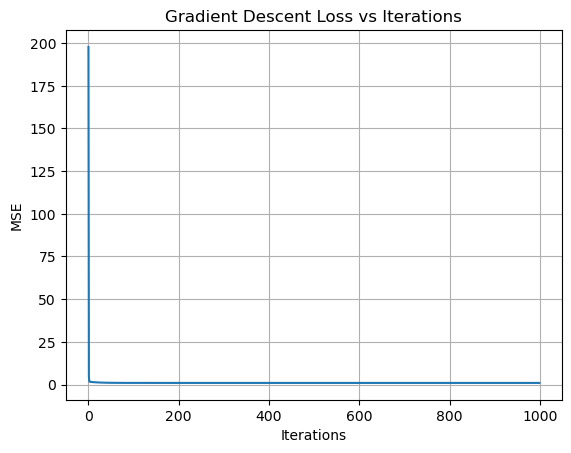

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# =========================
# Requirement 1: Generate Dataset
# =========================
np.random.seed(42)
n = 200
x = np.random.uniform(0, 5, n)         # x ∈ [0,5]
epsilon = np.random.normal(0, 1, n)    # Gaussian noise
y = 3 + 4 * x + epsilon                 # y = 3 + 4x + ε

# Add bias column for intercept
X_b = np.c_[np.ones(n), x]

# Plot raw data
plt.figure()
plt.scatter(x, y, alpha=0.6, label="Raw data")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Requirement 1: Synthetic Data")
plt.legend()
plt.show()

# =========================
# Requirement 2: Closed-Form Solution (Normal Equation)
# =========================
theta_closed = np.linalg.inv(X_b.T @ X_b) @ X_b.T @ y
y_pred_closed = X_b @ theta_closed

print("Requirement 2: Closed-form solution")
print("Intercept:", theta_closed[0])
print("Slope:", theta_closed[1])

# =========================
# Requirement 3: Gradient Descent
# =========================
theta = np.zeros(2)       # Initialize [intercept, slope]
eta = 0.05                # Learning rate
iterations = 1000
losses = []

for i in range(iterations):
    y_pred = X_b @ theta
    error = y_pred - y
    gradients = (2 / n) * X_b.T @ error
    theta -= eta * gradients
    losses.append(np.mean(error ** 2))

y_pred_gd = X_b @ theta

print("\nRequirement 3: Gradient Descent solution")
print("Intercept:", theta[0])
print("Slope:", theta[1])

# =========================
# Requirement 4: Comparison & Plots
# =========================
print("\nRequirement 4: Comparison")
print("Closed-form vs Gradient Descent:")
print(f"Intercepts: {theta_closed[0]:.4f} vs {theta[0]:.4f}")
print(f"Slopes: {theta_closed[1]:.4f} vs {theta[1]:.4f}")
print("\nComment: Gradient Descent converged to nearly the same solution as the closed-form method.")
print("Minor differences are due to numerical precision and finite iterations.")

# Plot raw data + fitted lines
plt.figure()
plt.scatter(x, y, alpha=0.6, label="Raw data")
plt.plot(x, y_pred_closed, color="red", label="Closed-form fit")
plt.plot(x, y_pred_gd, color="green", linestyle="--", label="Gradient Descent fit")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Linear Regression Comparison")
plt.legend()
plt.show()

# Plot loss curve
plt.figure()
plt.plot(losses)
plt.xlabel("Iterations")
plt.ylabel("MSE")
plt.title("Gradient Descent Loss vs Iterations")
plt.grid(True)
plt.show()
